# 資料增補 (Data Augmentation)

In [1]:
# 載入套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 以檔案目錄為基礎，建立訓練(Training)及驗證(Validation)資料集(Dataset)

In [2]:
import os
label_list = list(os.listdir('image_data'))
', '.join(label_list)

'丁, 七, 丈, 三, 上, 下, 不, 丐, 丑, 且, 丕, 世, 丘, 丙, 丞, 丟, 並, 丫, 中, 串, 丸, 丹, 主, 乃, 久, 么, 之, 乍, 乎, 乏, 乒, 乓, 乖, 乘, 乙, 九, 乞, 也, 乩, 乳, 乾, 亂, 了, 予, 事, 二, 于, 云, 互, 五, 井, 亙, 些, 亞, 亟, 亡, 交, 亥, 亦, 亨, 享, 京, 亭, 亮, 人, 什, 仁, 仃, 仄, 仆, 仇, 今, 介, 仍, 仔, 仕, 他, 仗, 付, 仙, 仞, 仟, 代, 令, 以, 仰, 仲, 仳, 件, 任, 份, 仿, 企, 伉, 伊, 伍, 伏, 伐, 休, 伕, 伙, 伯, 估, 伴, 伶, 伸, 伺, 似, 伽, 佃, 但, 佇, 位, 低, 住, 佐, 佑, 佔, 何, 佗, 余, 佛, 作, 佝, 佞, 你, 佣, 佩, 佬, 佯, 佰, 佳, 併, 佻, 佾, 使, 侃, 來, 侈, 例, 侍, 侏, 侖, 供, 依, 侮, 侯, 侵, 侶, 便, 係, 促, 俄, 俊, 俎, 俏, 俐, 俑, 俗, 俘, 俚, 保, 俞, 俟, 俠, 信, 修, 俯, 俱, 俳, 俸, 俺, 俾, 倀, 倆, 倉, 個, 倌, 倍, 倏, 們, 倒, 倔, 倖, 倘, 候, 倚, 借, 倡, 倣, 倥, 倦, 倨, 倩, 倪, 倫, 倭, 值, 偃, 假, 偉, 偌, 偎, 偏, 偕, 做, 停, 健, 側, 偵, 偶, 偷, 偺, 偽, 傀, 傅, 傍, 傑, 傖, 傘, 備, 傢, 催, 傭, 傯, 傲, 傳, 債, 傷, 傻, 傾, 僅, 像, 僑, 僕, 僖, 僚, 僥, 僧, 僭, 僮, 僱, 僵, 價, 僻, 儀, 儂, 億, 儈, 儉, 儐, 儒, 儔, 儘, 償, 儡, 優, 儲, 儷, 儼, 兀, 允, 元, 兄, 充, 兆, 兇, 先, 光, 克, 兌, 免, 兒, 兔, 兕, 兗, 兜, 兢, 入, 內, 全, 兩, 八, 公, 六, 兮, 共, 兵, 其, 具, 典, 兼, 冀, 冉, 冊, 再, 冑, 冒, 冕, 冗, 冠, 冢, 冤, 冥, 冬, 冰, 冶, 冷, 冽, 准, 凋, 凌, 凍, 凜, 凝, 几, 凡, 凰, 凱, 凳, 凶, 凸, 凹, 出, 函, 刀, 刁, 刃, 分, 切, 刈, 刊, 刎, 

In [3]:
# image_dataset_from_directory：讀取目錄中的檔案，存入 dataset
# image_dataset_from_directory：tf v2.3.0 才支援

image_size = (50, 50)  # 影像尺寸
batch_size = 100          # 批量

# 訓練資料集(Dataset)
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# 加 color_mode="grayscale", 試試看
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './image_data',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale", 
)
# 驗證(Validation)資料集
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './image_data',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale", 
#     class_names=label_list,
#     labels=None,
)

Found 54107 files belonging to 1305 classes.
Using 43286 files for training.
Found 54107 files belonging to 1305 classes.
Using 10821 files for validation.


In [4]:
# model 內有特徵縮放
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# val_ds = val_ds.map(process)

## 顯示訓練資料前9筆影像

In [5]:
# for images, labels in train_ds.take(1):
#     print(images)
#     break

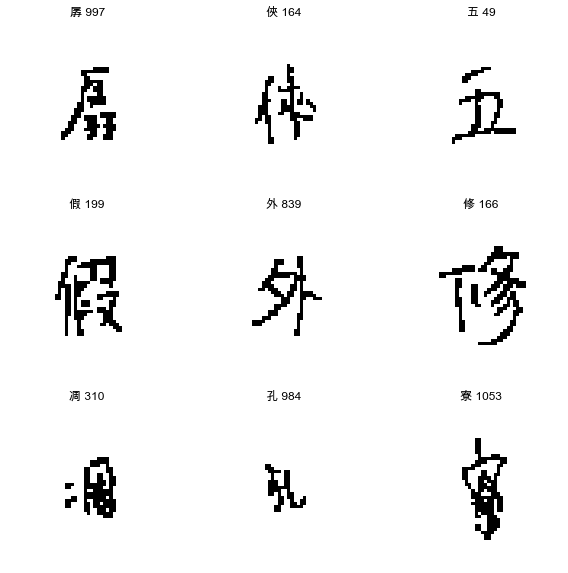

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

data = train_ds.take(1)
data = list(data.as_numpy_iterator())
images = data[0][0]
label = data[0][1]   

# 顯示訓練資料前9筆影像
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype(int), cmap='Greys_r')
    plt.title(label_list[int(label[i])] + ' ' + str(int(label[i])))
    plt.axis("off")

In [8]:
images[0].dtype

dtype('float32')

In [9]:
label

array([ 997,  164,   49,  199,  839,  166,  310,  984, 1053,  930,   16,
        912,  796,  826,  749,   34,  736,  286,  175,  361,  133,  967,
        368,  424,  837,  439,  873,  851,  773,  599,  293,  864,  135,
         42,  448,  357,  868,  284,   20,  833,  872,  602,  609, 1044,
        294,  780,  318,  534,  933,  628,  517,  648,  518,  528,  852,
        418,  273, 1054,  275,  214,   33,  560,  701,  756,  331, 1007,
        406,  675,  958,  531,  165,  458,  141,  730,  834,  613,   89,
        391,  486,  798,  435,  676,  514,  911,  347,  559,  600,  897,
        629,  588,  532,  654,  963,  878,  937,  825,  639,  738,  410,
        378])

## 定義資料增補(Data Augmentation)

In [24]:
# https://www.tensorflow.org/tutorials/images/data_augmentation
# RandomFlip("horizontal")：水平翻轉
# RandomRotation(0.1)：旋轉 0.1 比例 
data_augmentation = keras.Sequential(
    [
#         layers.RandomFlip("horizontal"),
#         layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
#         layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
#         layers.RandomWidth(0.5),
    ]
)

## 顯示資料增補後的影像

In [11]:
data = train_ds.take(1)
data = list(data.as_numpy_iterator())
images = data[0][0]
label = data[0][1]   

images.shape, label

((100, 50, 50, 1),
 array([ 782,  510,  474,  348,  278,   34,  955,  294,  361, 1056,  143,
          27,  818,  326,  887,  937,  806,  148,  504,  448,  210,  937,
         577, 1089,  725,  112,  444,  613,  741,  141,  636,  446,  865,
         725,  121, 1003,  169,   68,  873,  943, 1023,  868,  620,   16,
         458,  512,  349,  318, 1044,  733,  649, 1010,  446,  952,  456,
         855,  591,  749,  577,  683,  476,   86,  154,  439,  376,  711,
         439,  114,  178,  123,  600, 1005,   89,  225,  839,  695, 1044,
           7,  572,  919,  736,  537,  825,   96,   58,  648,  130,  127,
         272,  159,  297,  284,  521,  186,  873,  852,   75,  288,  935,
         948]))

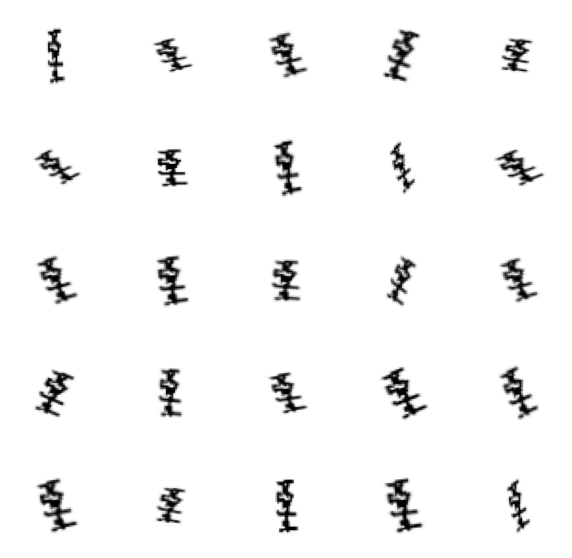

In [12]:
# 顯示資料增補後的影像
# prefetch 就沒有效果了
plt.figure(figsize=(10, 10))
for i in range(25):
    augmented_images = data_augmentation(images[0:1])
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0], cmap='Greys_r')
    plt.axis("off")
# print(augmented_images.shape)

## prefetch：預先讀取訓練資料，以提升效能

In [25]:
train_ds = train_ds.prefetch(buffer_size=batch_size)
val_ds = val_ds.prefetch(buffer_size=batch_size)

## 建立模型

In [26]:
image_size + (1,)

(50, 50, 1)

In [27]:
# 定義模型
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # 特徵縮放
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    activation = "softmax"
    units = num_classes

    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

# 建立模型
model = make_model(input_shape=image_size + (1,), num_classes=len(label_list))
# 繪製模型結構
# keras.utils.plot_model(model, show_shapes=True)

## 訓練模型

In [28]:
epochs = 5

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# 模型訓練
model.fit(
    train_ds, epochs=epochs, validation_data=val_ds
)

Epoch 1/5
433/433 [==============================] - 56s 124ms/step - loss: 5.1270 - accuracy: 0.0949 - val_loss: 6.5518 - val_accuracy: 0.0074
Epoch 2/5
433/433 [==============================] - 54s 123ms/step - loss: 1.9566 - accuracy: 0.5075 - val_loss: 20.1166 - val_accuracy: 0.0101
Epoch 3/5
433/433 [==============================] - 54s 125ms/step - loss: 1.0792 - accuracy: 0.7079 - val_loss: 7.8666 - val_accuracy: 0.1124
Epoch 4/5
433/433 [==============================] - 54s 124ms/step - loss: 0.7647 - accuracy: 0.7841 - val_loss: 28.1481 - val_accuracy: 0.0143
Epoch 5/5
433/433 [==============================] - 54s 124ms/step - loss: 0.5975 - accuracy: 0.8270 - val_loss: 1.3059 - val_accuracy: 0.6938


### 訓練 50 epochs，驗證準確率可達 96%.

## 從目錄中任選一個檔案測試

In [29]:
with open('./labels.txt', 'r', encoding='utf8') as f:
    text = f.read()
labels = {}    
for i, item in enumerate(text.split('\n')):
    labels[i]=item

In [40]:
# 任取一筆資料測試
import os, numpy as np

def predict(file_path):
    img = keras.preprocessing.image.load_img(
        file_path, target_size=image_size, color_mode="grayscale"
    )
    img_array = keras.preprocessing.image.img_to_array(img) # 將影像轉為陣列
    img_array = tf.expand_dims(img_array, 0)  # 增加一維在最前面，代表一筆資料
    print(img_array.shape)
    predictions = model.predict(img_array)
    pred = np.argmax(predictions, axis=-1)[0]
    score = np.max(predictions, axis=-1)[0]
    print(f"預測={labels[pred]}, 機率= {(100 * score):.2f}%")

In [41]:
predict(r".\image_data\博\7.png")

(1, 50, 50, 1)
1/1 [==============================] - 0s 17ms/step
預測=博, 機率= 68.18%


In [42]:
predict(r".\image_data\乙\7.png")

(1, 50, 50, 1)
1/1 [==============================] - 0s 16ms/step
預測=乙, 機率= 99.99%


In [43]:
predict(r".\image_data\丐\7.png")

(1, 50, 50, 1)
1/1 [==============================] - 0s 17ms/step
預測=丐, 機率= 99.96%


(9, 50, 50, 1)

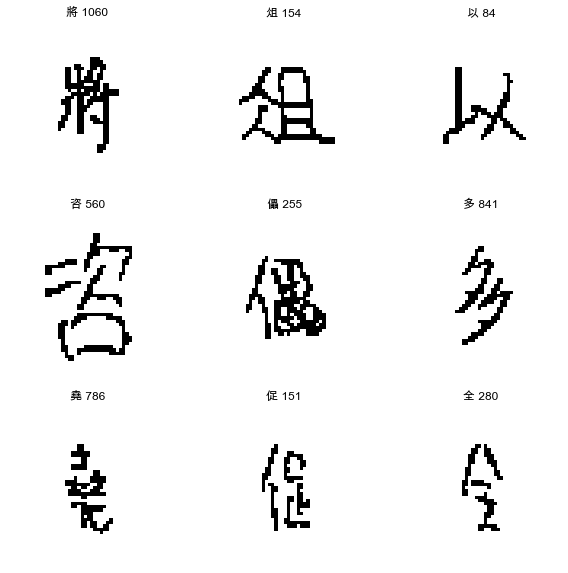

In [32]:
data = train_ds.take(1)
data = list(data.as_numpy_iterator())
images = data[0][0]
label = data[0][1]   

true_labels_list=[]
# 顯示訓練資料前9筆影像
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype(int), cmap='Greys_r')
    plt.title(label_list[int(label[i])] + ' ' + str(int(label[i])))
    plt.axis("off")
    true_labels_list += [int(label[i])]
    images_expand = np.expand_dims(images[i].astype(int),0)
    if i==0:
        test_images = images_expand
    else:
        test_images = np.concatenate((test_images, images_expand), axis=0)
test_images.shape

In [33]:
# 預測
predictions = model.predict(test_images)
print(true_labels_list)
print(list(np.argmax(predictions, axis=-1)))

for pred in true_labels_list:
    print(labels[pred], end=', ')
print()    
for pred in np.argmax(predictions, axis=-1):
    print(labels[pred], end=', ')    

1/1 [==============================] - 0s 234ms/step
[1060, 154, 84, 560, 255, 841, 786, 151, 280]
[1060, 154, 84, 560, 255, 841, 786, 160, 83]
將, 俎, 以, 咨, 儡, 多, 堯, 促, 全, 
將, 俎, 以, 咨, 儡, 多, 堯, 俚, 令, 

In [34]:
# 模型存檔
model.save('./chinese_model.h5')

In [35]:
# 模型載入
model = tf.keras.models.load_model('./chinese_model.h5')